<a href="https://colab.research.google.com/github/jiyanshud22/TEMP/blob/main/scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = "https://www.espncricinfo.com/records"

try:
    # Send a GET request to the website
    response = requests.get(url)
    response.raise_for_status()  # Raise an HTTPError for bad responses
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table containing the cricket data
    teams_sec = soup.find("div", {"class": "ds-block"})

    team_names = [ele.get('href').strip().split('/')[-1] for ele in teams_sec.find_all('a')]
    print(team_names)

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from the website: {e}")

['afghanistan-40', 'australia-2', 'bangladesh-25', 'england-1', 'icc-world-xi-140', 'india-6', 'ireland-29', 'new-zealand-5', 'pakistan-7', 'south-africa-3', 'sri-lanka-8', 'west-indies-4', 'zimbabwe-9', 'africa-xi-4058', 'asia-xi-106']


In [ ]:

def get_team_url(team_name, match_type, role):
    if team_name == 'africa-xi-4058' or team_name == 'asia-xi-106':
        url = "https://www.espncricinfo.com/records/team/averages-{}/{}".format(role, team_name)
    else:
        url = "https://www.espncricinfo.com/records/team/averages-{}/{}/{}".format(role, team_name, match_type)
    return url

def parse_table(url, team_name):
    try:
        # Send a GET request to the website
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the table containing the cricket data
        table = soup.find("table")  # Adjust with class or id if the table is identifiable

        # Extract table headers
        headers = [header.text.strip() for header in table.find_all("tr")[0]]
        headers = headers + ['Country']

        team_name = team_name.split('-')[:-1]
        team_name = ' '.join(team_name).title()

        # Extract table rows
        rows = []
        for row in table.find_all("tr")[1:]:  # Skip the header row
            cols = [col.text.strip() for col in row.find_all("td")]
            cols = cols + [team_name]
            rows.append(cols)

        # Create a DataFrame for better visualization
        df = pd.DataFrame(rows, columns=headers)

        # return the DataFrame
        return df

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from the website: {e}")


Batting Averages

In [ ]:
import os

# Create a directory to store the data
if os.path.exists("batting_averages.csv"):
    os.remove("batting_averages.csv")

df = pd.DataFrame(columns=['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'SR', '100', '50', '0', 'Country'])
df.to_csv("batting_averages.csv", index=False)

for team in team_names:
    if team not in ['africa-xi-4058', 'asia-xi-106', 'icc-world-xi-140']:
        url = get_team_url(team, 'test-matches-1', 'batting')
        df = parse_table(url, team)

        df.to_csv("batting_averages.csv", index=False, header=False, mode='a')
print("Data saved to batting_averages.csv")


Data saved to batting_averages.csv


In [ ]:
df = pd.read_csv("batting_averages.csv")
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0,Country
0,Abdul Malik,2021-2025,4,7,-,63,23,9.00,49.21,-,-,2,Afghanistan
1,Abdul Wasi,2021-2021,1,2,-,12,9,6.00,17.14,-,-,-,Afghanistan
2,Afsar Zazai,2018-2025,8,13,1,348,113,29.00,51.78,1,-,1,Afghanistan
3,Amir Hamza,2019-2023,4,6,2,83,34,20.75,38.78,-,-,-,Afghanistan
4,Asghar Afghan,2018-2021,6,10,-,440,164,44.00,57.06,1,3,1,Afghanistan


Bowling Averages

In [ ]:
import os

# Create a directory to store the data
if os.path.exists("bowling_averages.csv"):
    os.remove("bowling_averages.csv")

df = pd.DataFrame(columns=['Player', 'Span', 'Mat', "Inns"  , "Balls", "Mdns", "Runs", "Wkts", "BBI", "Ave", "Econ", "SR", "5", "10", "Ct", "St", "Country"])
df.to_csv("bowling_averages.csv", index=False)

for team in team_names:
    if team not in ['africa-xi-4058', 'asia-xi-106', 'icc-world-xi-140']:
        url = get_team_url(team, 'test-matches-1', 'bowling')
        df = parse_table(url, team)

        df.to_csv("bowling_averages.csv", index=False, header=False, mode='a')
print("Data saved to bowling_averages.csv")


Data saved to bowling_averages.csv


In [ ]:
df = pd.read_csv("bowling_averages.csv")
df.head()

,Player,Span,Mat,Inns,Balls,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,5,10,Ct,St,Country
0,Abdul Malik,2021-2025,4,3,54,1,45,-,-,0.00,5.00,-,-,-,7,-,Afghanistan
1,Abdul Wasi,2021-2021,1,1,53,-,23,-,-,0.00,2.60,-,-,-,-,-,Afghanistan
2,Afsar Zazai,2018-2025,8,-,0,-,-,-,-,0.00,-,-,-,-,19,1,Afghanistan
3,Amir Hamza,2019-2023,4,8,984,22,517,18,6/75,28.72,3.15,54.6,2,-,2,-,Afghanistan
4,Asghar Afghan,2018-2021,6,2,18,-,17,-,-,0.00,5.66,-,-,-,2,-,Afghanistan


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Example dataset of historical cricket metrics
data = {
    'Year': range(1900, 2025),
    'Avg_Runs_Per_Match': [200 + i * 0.5 for i in range(125)],  # Example trend
    'Bowling_Avg': [30 - i * 0.1 for i in range(125)],           # Example trend
    'Strike_Rate': [40 + i * 0.2 for i in range(125)],           # Example trend
}
df = pd.DataFrame(data)

# Apply clustering to define eras
kmeans = KMeans(n_clusters=5, random_state=42)
df['Era'] = kmeans.fit_predict(df[['Avg_Runs_Per_Match', 'Bowling_Avg', 'Strike_Rate']])

# Display clustered eras
print(df.groupby('Era').agg({'Year': ['min', 'max']}))

     Year      
      min   max
Era            
0    1946  1970
1    1997  2024
2    1900  1922
3    1971  1996
4    1923  1945


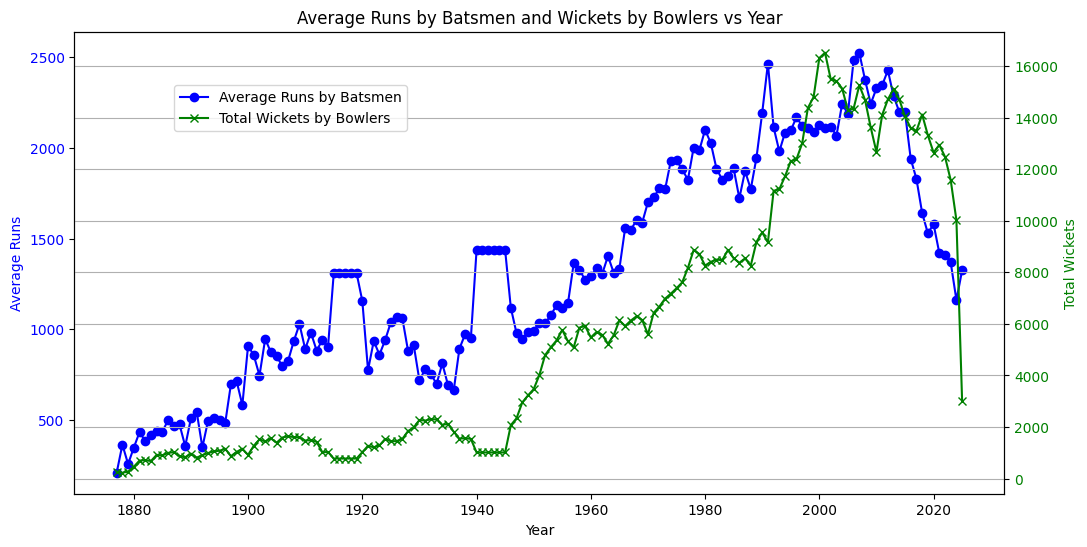

In [ ]:
import matplotlib.pyplot as plt

# Preparing data for plotting

bowling_data = pd.read_csv("Updated_Bowling.csv")
batting_data = pd.read_csv("Updated_Batting.csv")

# Extract year-wise data for batting (average runs) and bowling (total wickets)
batting_data['Years'] = batting_data.apply(lambda row: list(range(row['Start year'], row['End year'] + 1)), axis=1)
bowling_data['Years'] = bowling_data.apply(lambda row: list(range(row['Start year'], row['End year'] + 1)), axis=1)

# Expand rows based on the range of years
batting_expanded = batting_data.explode('Years')
bowling_expanded = bowling_data.explode('Years')

# Group by years and calculate average runs and total wickets
batting_yearly = batting_expanded.groupby('Years')['Runs'].mean().reset_index(name='Avg Runs')
bowling_yearly = bowling_expanded.groupby('Years')['Wkts'].sum().reset_index(name='Total Wickets')

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting average runs
ax1.plot(batting_yearly['Years'], batting_yearly['Avg Runs'], label='Average Runs by Batsmen', color='blue', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Runs', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a twin axis for wickets
ax2 = ax1.twinx()
ax2.plot(bowling_yearly['Years'], bowling_yearly['Total Wickets'], label='Total Wickets by Bowlers', color='green', marker='x')
ax2.set_ylabel('Total Wickets', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding title and legends
plt.title('Average Runs by Batsmen and Wickets by Bowlers vs Year')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
plt.grid()

plt.show()

In [ ]:
# Plotly plot
import plotly.express as px

fig = px.line(batting_yearly, x='Years', y='Avg Runs', title='Average Runs by Batsmen vs Year')
fig.add_scatter(x=bowling_yearly['Years'], y=bowling_yearly['Total Wickets'], mode='lines', name='Total Wickets by Bowlers')
fig.update_yaxes(title_text='Average Runs', secondary_y=False)
fig.update_yaxes(title_text='Total Wickets', secondary_y=True)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

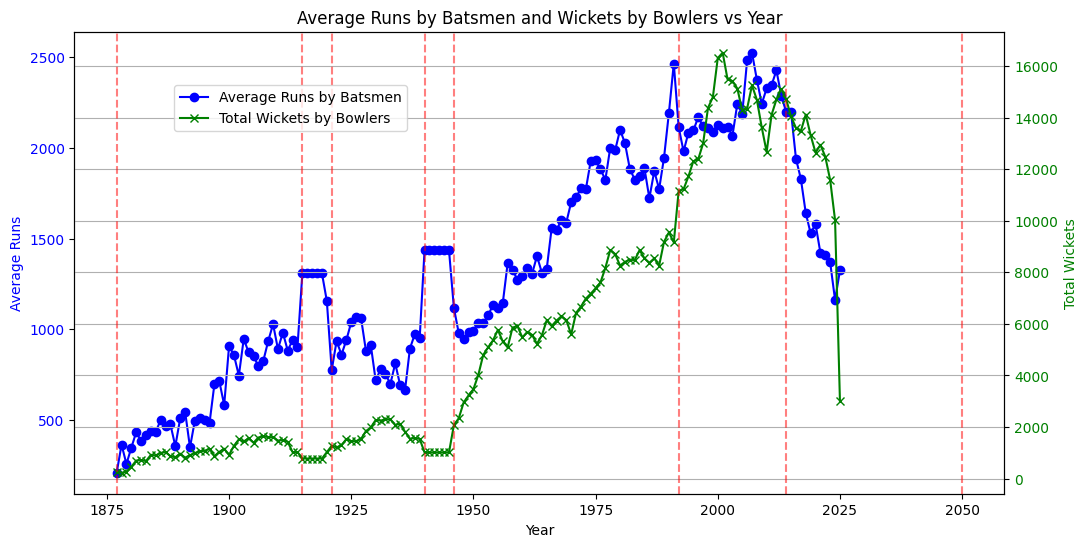

In [ ]:
eras = ["1877", "1915", "1921", "1940", "1946", "1992", "2014", "2050"]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting average runs
ax1.plot(batting_yearly['Years'], batting_yearly['Avg Runs'], label='Average Runs by Batsmen', color='blue', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Runs', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a twin axis for wickets
ax2 = ax1.twinx()
ax2.plot(bowling_yearly['Years'], bowling_yearly['Total Wickets'], label='Total Wickets by Bowlers', color='green', marker='x')
ax2.set_ylabel('Total Wickets', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding title and legends
plt.title('Average Runs by Batsmen and Wickets by Bowlers vs Year')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
plt.grid()

# Adding vertical lines for eras
for era in eras:
    plt.axvline(x=int(era), color='red', linestyle='--', alpha=0.5)

plt.show()


In [ ]:
# Divide the data into eras
era_data = []
for i in range(len(eras) - 1):
    era = batting_data[(batting_data['Start year'] >= int(eras[i])) & (batting_data['End year'] <= int(eras[i + 1]))]
    era_data.append(era)

# Display the data for each era
for i, era in enumerate(era_data):
    print(f"Era {i + 1} ({eras[i]} - {eras[i + 1]})")
    print(era[['Player', 'Runs']])
    print("\n")



Era 1 (1877 - 1915)
             Player  Runs
41      G Alexander    52
43         FE Allan     5
45         RC Allen    44
54     AC Bannerman  1108
55      C Bannerman   239
...             ...   ...
2577    CH Vintcent    26
2578     AEE Vogler   340
2589       GC White   872
2592  JT Willoughby     8
2593      CS Wimble     0

[351 rows x 2 columns]


Era 2 (1915 - 1921)
             Player  Runs
301     EA McDonald   116
383         RL Park     0
387       CE Pellew   484
779       AE Dipper    51
783       A Dolphin     1
787         A Ducat     5
791      FJ Durston     8
801        AJ Evans    18
869    HTW Hardinge    30
960       DJ Knight    54
1016  JWH Makepeace   279
1076     CWL Parker     3
1133    TL Richmond     6
1278   A Waddington    16
1310      ER Wilson    10
2339       CN Frank   236
2407     NV Lindsay    35
2427       WFE Marx   125
2498         N Reid    17


Era 3 (1921 - 1940)
            Player  Runs
38    EL a'Beckett   143
42    HH Alexander    17
46   

In [ ]:
# Normalize the Batting data within each era
normalized_data = []
for era in era_data:
    era['Normalized Runs'] = (era['Runs'] - era['Runs'].mean()) / era['Runs'].std()
    normalized_data.append(era)

# Display the normalized data for each era
for i, era in enumerate(normalized_data):
    print(f"Era {i + 1} ({eras[i]} - {eras[i + 1]})")
    print(era[['Player', 'Normalized Runs']])
    print("\n")

In [16]:
# Clean and preprocess data
batting_data['Start year'] = batting_data['Span'].str.split('-').str[0].astype(int)
batting_data['End year'] = batting_data['Span'].str.split('-').str[1].astype(int)

# Replace non-numeric values in 'Runs' with NaN and convert to float
batting_data['Runs'] = pd.to_numeric(batting_data['Runs'], errors='coerce')

# Define eras
eras = [1877, 1915, 1921, 1940, 1946, 1992, 2014, 2050]

# Divide batting data by eras
era_data = []
for i in range(len(eras) - 1):
    era_batting = batting_data[
        (batting_data['Start year'] >= eras[i]) & (batting_data['End year'] <= eras[i + 1])
    ]
    era_data.append(era_batting)

# Normalize performance data within each era
normalized_data = []
for era in era_data:
    era = era.copy()  # Ensure modifications are local to the loop
    era['Normalized Runs'] = (era['Runs'] - era['Runs'].mean()) / era['Runs'].std()
    normalized_data.append(era)

# Combine data across eras
combined_data = pd.concat(normalized_data, ignore_index=True)


In [19]:
def parse_table(url, team_name):
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table")
    headers = [header.text.strip() for header in table.find("thead").find_all("th")]
    team_name = ' '.join(team_name.split('-')[:-1]).title()
    rows = []

    for row in table.find("tbody").find_all("tr"):
        cols = [col.text.strip() for col in row.find_all("td")]
        if len(cols) != len(headers):  # Ensure row matches header count
            continue
        cols.append(team_name)
        rows.append(cols)

    headers.append('Country')  # Add the Country column
    return pd.DataFrame(rows, columns=headers)

# Debugging step: Inspect data after scraping
batting_url = get_team_url('australia-2', "test-matches-1", "batting")
batting_team_df = parse_table(batting_url, 'australia-2')
print("Sample Batting Data:")
print(batting_team_df.head())

# Correct processing after inspecting headers
if 'Span' in batting_team_df.columns:
    batting_data['Start year'] = batting_data['Span'].str.split('-').str[0].astype(int)
    batting_data['End year'] = batting_data['Span'].str.split('-').str[1].astype(int)
else:
    print("Column 'Span' not found. Check the scraped data structure.")


Sample Batting Data:
Empty DataFrame
Columns: [Country]
Index: []
Column 'Span' not found. Check the scraped data structure.


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the provided data
batting_data = pd.read_csv('/content/Updated_Batting.csv')
bowling_data = pd.read_csv('/content/Updated_Bowling.csv')

# Preprocess Batting Data
batting_data['Start year'] = batting_data['Start year'].astype(int)
batting_data['End year'] = batting_data['End year'].astype(int)

# Define eras
eras = [1877, 1915, 1921, 1940, 1946, 1992, 2014, 2050]

# Segment data into eras
era_data = []
for i in range(len(eras) - 1):
    era_batting = batting_data[
        (batting_data['Start year'] >= eras[i]) & (batting_data['End year'] <= eras[i + 1])
    ]
    era_data.append(era_batting)

# Normalize within each era
normalized_data = []
for era in era_data:
    era = era.copy()
    for col in ['Mat', 'Inns', 'Runs', 'HS', 'Ave', '100', '50', '0']:
        era[col] = pd.to_numeric(era[col], errors='coerce')  # Ensure numeric
        era[col] = (era[col] - era[col].mean()) / era[col].std()  # Normalize
    normalized_data.append(era)

# Combine all normalized data
combined_data = pd.concat(normalized_data, ignore_index=True)

# PCA
numeric_columns = ['Mat', 'Inns', 'Runs', 'HS', 'Ave', '100', '50', '0']
pca_data = combined_data[numeric_columns].fillna(0)
pca = PCA(n_components=len(numeric_columns))
pca.fit(pca_data)

# PCA Scores and Rankings
pca_weights = pca.components_[0]
combined_data['PCA_Score'] = pca_data.dot(pca_weights)
combined_data['Ranking'] = combined_data['PCA_Score'].rank(ascending=False)

# Save final rankings
final_rankings = combined_data[['Player', 'PCA_Score', 'Ranking']].sort_values(by='Ranking')
final_rankings.to_csv('/content/final_rankings.csv', index=False)

# Display the entire list
print("Complete Player Rankings:")
print(final_rankings)


Complete Player Rankings:
              Player  PCA_Score  Ranking
501      H Sutcliffe  17.208313      1.0
1778      RT Ponting  15.768776      2.0
2201       JH Kallis  15.566638      3.0
1117     SM Gavaskar  15.556157      4.0
41            C Hill  14.947181      5.0
...              ...        ...      ...
1446  Shahid Mahboob  -2.031183   2939.0
681         PJ Allan  -2.031183   2939.0
849        JW Wilson  -2.031183   2939.0
1341      CA Snedden  -2.031183   2939.0
1649       AB Howard  -2.031183   2939.0

[2944 rows x 3 columns]


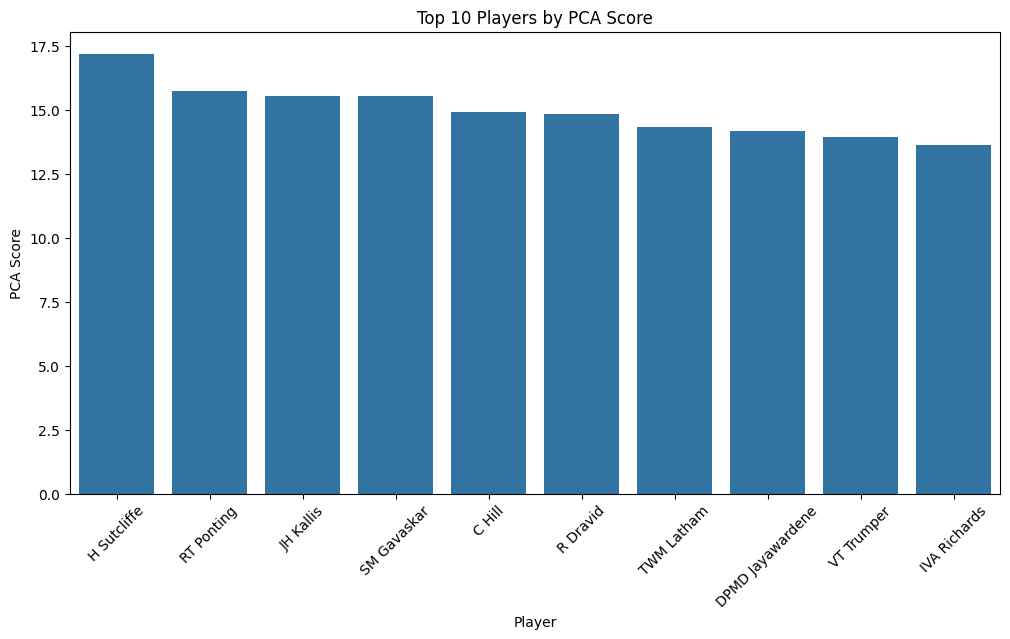

Top 10 Players by PCA Score:
                Player  PCA_Score  Ranking
501        H Sutcliffe  17.208313      1.0
1778        RT Ponting  15.768776      2.0
2201         JH Kallis  15.566638      3.0
1117       SM Gavaskar  15.556157      4.0
41              C Hill  14.947181      5.0
1970          R Dravid  14.838308      6.0
2708        TWM Latham  14.349253      7.0
2263  DPMD Jayawardene  14.169225      8.0
93          VT Trumper  13.958701      9.0
1690      IVA Richards  13.646417     10.0


In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided data
batting_data = pd.read_csv('/content/Updated_Batting.csv')
bowling_data = pd.read_csv('/content/Updated_Bowling.csv')

# Preprocess Batting Data
batting_data['Start year'] = batting_data['Start year'].astype(int)
batting_data['End year'] = batting_data['End year'].astype(int)

# Define eras
eras = [1877, 1915, 1921, 1940, 1946, 1992, 2014, 2050]

# Segment data into eras
era_data = []
for i in range(len(eras) - 1):
    era_batting = batting_data[
        (batting_data['Start year'] >= eras[i]) & (batting_data['End year'] <= eras[i + 1])
    ]
    era_data.append(era_batting)

# Normalize within each era
normalized_data = []
for era in era_data:
    era = era.copy()
    for col in ['Mat', 'Inns', 'Runs', 'HS', 'Ave', '100', '50', '0']:
        era[col] = pd.to_numeric(era[col], errors='coerce')  # Ensure numeric
        era[col] = (era[col] - era[col].mean()) / era[col].std()  # Normalize
    normalized_data.append(era)

# Combine all normalized data
combined_data = pd.concat(normalized_data, ignore_index=True)

# PCA
numeric_columns = ['Mat', 'Inns', 'Runs', 'HS', 'Ave', '100', '50', '0']
pca_data = combined_data[numeric_columns].fillna(0)
pca = PCA(n_components=len(numeric_columns))
pca.fit(pca_data)

# PCA Scores and Rankings
pca_weights = pca.components_[0]
combined_data['PCA_Score'] = pca_data.dot(pca_weights)
combined_data['Ranking'] = combined_data['PCA_Score'].rank(ascending=False)

# Save final rankings
combined_data[['Player', 'PCA_Score', 'Ranking']].to_csv('/content/final_rankings.csv', index=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=combined_data.sort_values(by='Ranking').head(10)['Player'],
    y=combined_data.sort_values(by='Ranking').head(10)['PCA_Score']
)
plt.xticks(rotation=45)
plt.title('Top 10 Players by PCA Score')
plt.ylabel('PCA Score')
plt.show()

# Print top players
print("Top 10 Players by PCA Score:")
print(combined_data[['Player', 'PCA_Score', 'Ranking']].sort_values(by='Ranking').head(10))


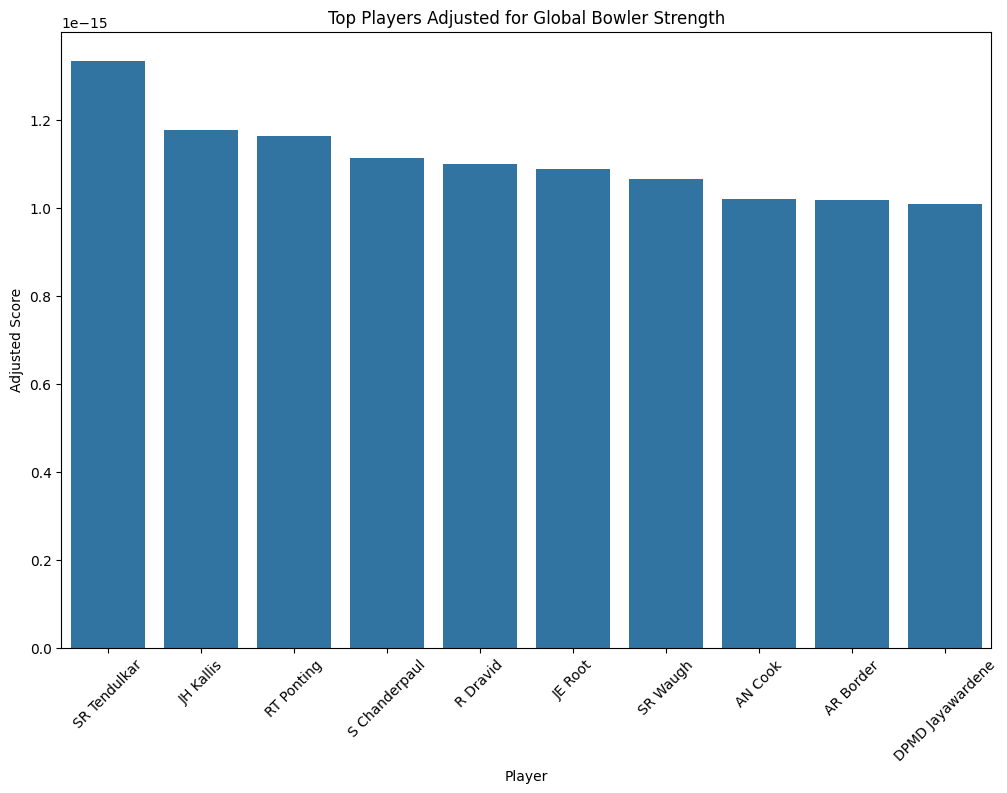

                  Adjusted_Score  Ranking
Player                                   
SR Tendulkar        1.333030e-15      1.0
JH Kallis           1.176848e-15      2.0
RT Ponting          1.162630e-15      3.0
S Chanderpaul       1.111694e-15      4.0
R Dravid            1.098667e-15      5.0
JE Root             1.087319e-15      6.0
SR Waugh            1.065553e-15      7.0
AN Cook             1.019520e-15      8.0
AR Border           1.018245e-15      9.0
DPMD Jayawardene    1.007510e-15     10.0


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA

batting_file_path = '/content/Updated_Batting.csv'
bowling_file_path = '/content/Updated_Bowling.csv'

batting_data = pd.read_csv(batting_file_path)
bowling_data = pd.read_csv(bowling_file_path)

# Calculate bowler strength based on available statistics
for col in ['Ave', 'Econ', 'SR']:
    bowling_data[col] = bowling_data[col].replace(0, np.nan)
    bowling_data[col] = 1 / bowling_data[col]

bowling_data['Strength'] = zscore(
    bowling_data[['Ave', 'Econ', 'SR', '5']].mean(axis=1, skipna=True)
)

# Compute a global average bowler strength
global_bowler_strength = bowling_data['Strength'].mean()

# Assign global bowler strength to all batsmen
batting_data['Avg_Bowler_Strength'] = global_bowler_strength

# Set player names as the index
batting_data.set_index('Player', inplace=True)

# Identify numeric columns
numeric_columns = batting_data.select_dtypes(include=['float64', 'int64']).columns

# Drop constant columns
constant_columns = [col for col in numeric_columns if batting_data[col].nunique() <= 1]
batting_data.drop(columns=constant_columns, inplace=True)
numeric_columns = batting_data.select_dtypes(include=['float64', 'int64']).columns

# Ensure no non-numeric columns are being used
batting_data = batting_data[numeric_columns]

# Fill missing values with column mean
batting_data.fillna(batting_data.mean(), inplace=True)

# Standardize numeric data
scaled_data = batting_data.apply(lambda col: zscore(col, nan_policy="omit"))

# Perform PCA
pca = PCA(n_components=min(len(numeric_columns), scaled_data.shape[0]))
pca.fit(scaled_data)

pca_weights = pca.components_[0]
scores = scaled_data.dot(pca_weights)
batting_data['Score'] = scores
batting_data['Adjusted_Score'] = batting_data['Score'] * global_bowler_strength
batting_data['Ranking'] = batting_data['Adjusted_Score'].rank(method='dense', ascending=False)

ranked_players = batting_data.sort_values(by='Ranking')

plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_players.index[:10], y=ranked_players['Adjusted_Score'][:10])
plt.xticks(rotation=45)
plt.ylabel('Adjusted Score')
plt.title('Top Players Adjusted for Global Bowler Strength')
plt.show()

print(ranked_players[['Adjusted_Score', 'Ranking']].head(10))


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Load data
batting_file_path = '/content/Updated_Batting.csv'
bowling_file_path = '/content/Updated_Bowling.csv'

batting_data = pd.read_csv(batting_file_path)
bowling_data = pd.read_csv(bowling_file_path)

# Calculate bowler strength based on available statistics
for col in ['Ave', 'Econ', 'SR']:
    bowling_data[col] = bowling_data[col].replace(0, np.nan)
    bowling_data[col] = 1 / bowling_data[col]

bowling_data['Strength'] = zscore(
    bowling_data[['Ave', 'Econ', 'SR', '5']].mean(axis=1, skipna=True)
)

# Compute a global average bowler strength
global_bowler_strength = bowling_data['Strength'].mean()

# Assign global bowler strength to all batsmen
batting_data['Avg_Bowler_Strength'] = global_bowler_strength

# Set player names as the index
batting_data.set_index('Player', inplace=True)

# Identify numeric columns
numeric_columns = batting_data.select_dtypes(include=['float64', 'int64']).columns

# Drop constant columns
constant_columns = [col for col in numeric_columns if batting_data[col].nunique() <= 1]
batting_data.drop(columns=constant_columns, inplace=True)
numeric_columns = batting_data.select_dtypes(include=['float64', 'int64']).columns

# Ensure no non-numeric columns are being used
batting_data = batting_data[numeric_columns]

# Fill missing values with column mean
batting_data.fillna(batting_data.mean(), inplace=True)

# Standardize numeric data
scaled_data = batting_data.apply(lambda col: zscore(col, nan_policy="omit"))

# Perform PCA
pca = PCA(n_components=min(len(numeric_columns), scaled_data.shape[0]))
pca.fit(scaled_data)

pca_weights = pca.components_[0]
scores = scaled_data.dot(pca_weights)
batting_data['Score'] = scores
batting_data['Adjusted_Score'] = batting_data['Score'] * global_bowler_strength
batting_data['Ranking'] = batting_data['Adjusted_Score'].rank(method='dense', ascending=False)

# Create the ranked players DataFrame
ranked_players = batting_data.sort_values(by='Ranking')

# Save the complete rankings to a CSV file
csv_path = '/content/final_ranked_players.csv'
ranked_players.to_csv(csv_path, index=True)

print(f"The complete rankings have been saved to: {csv_path}")


The complete rankings have been saved to: /content/final_ranked_players.csv
